In [1]:
from kaa.reach import ReachSet
from kaa.plotutil import Plot
from models.vanderpol import VanDerPol, VanDerPol_UnitBox
from models.sir import SIR_UnitBox, SIR
from models.harosc import HarOsc

from kaa.temp.pca_strat import PCAStrat
from kaa.temp.lin_app_strat import LinStrat
from kaa.bundle import BundleMode
from kaa.settings import PlotSettings
from kaa.timer import Timer


PlotSettings.save_fig = False #Enable interactive mode


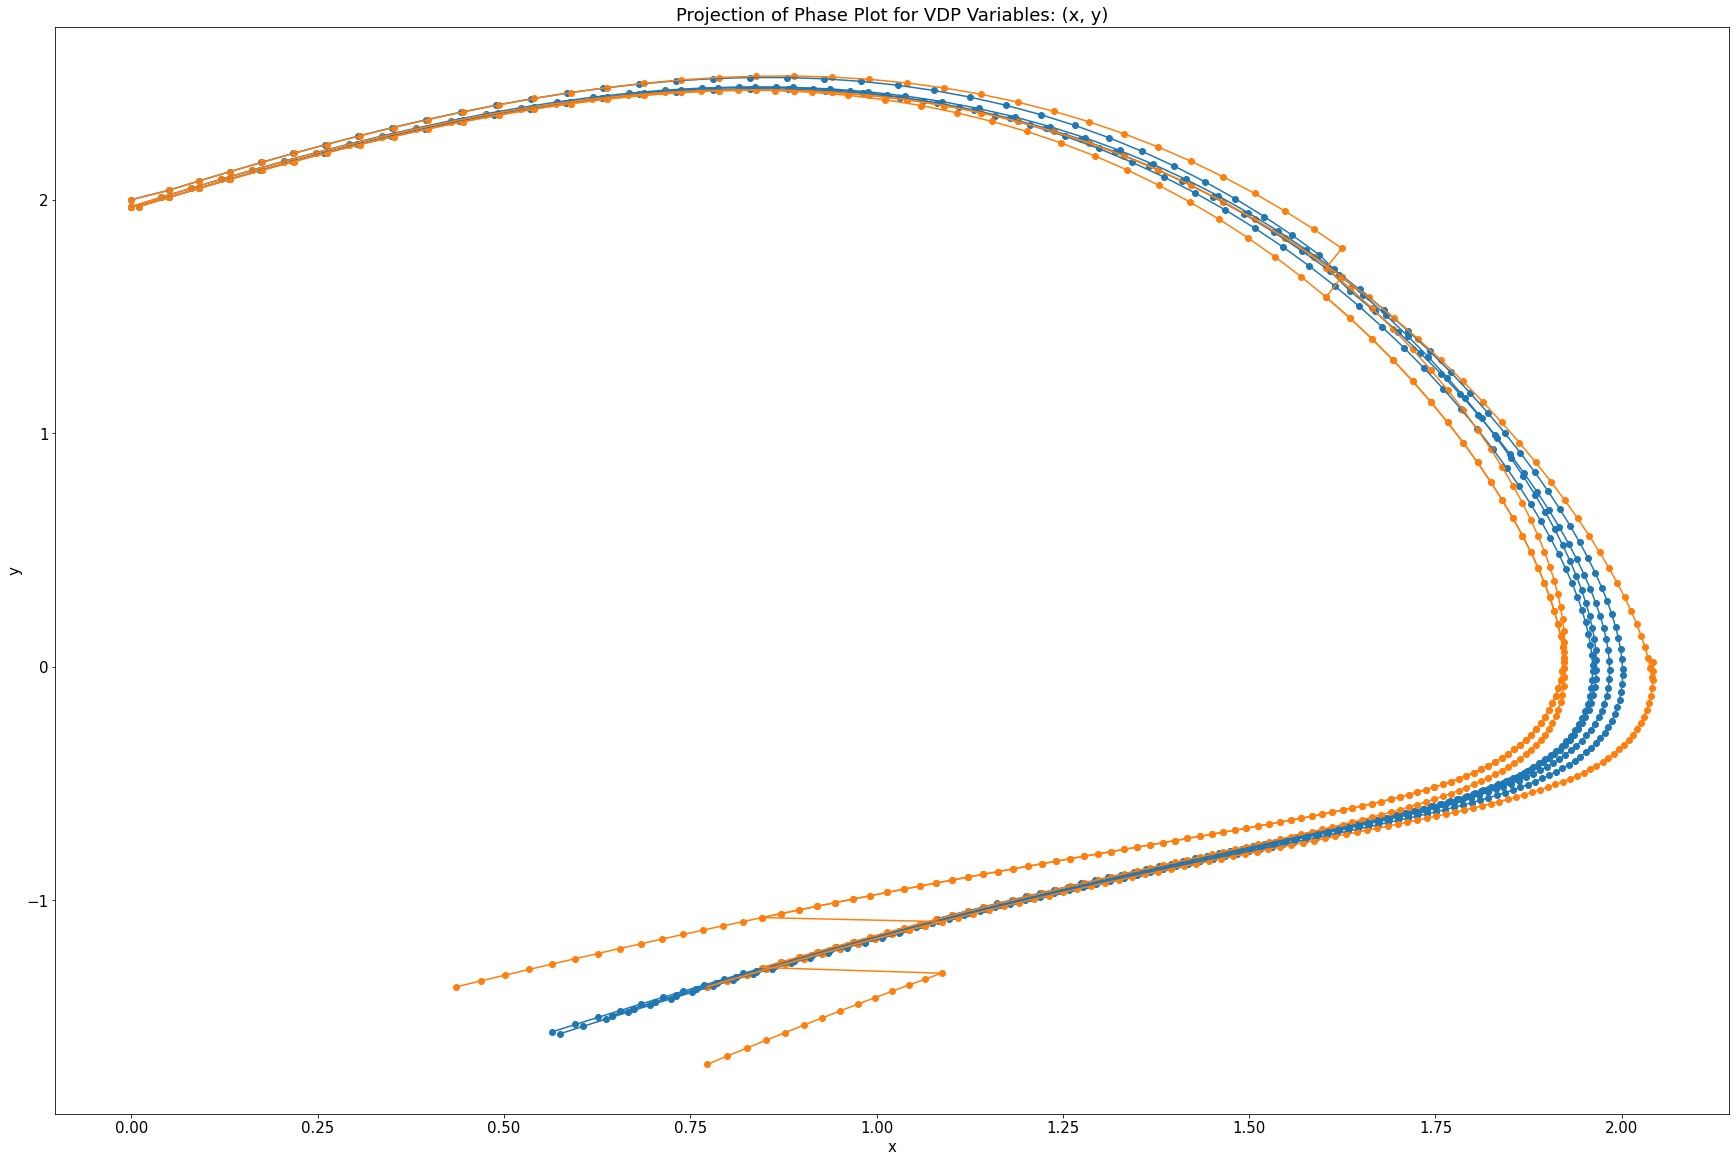

Plotting phase for dimensions x, y done -- Time Spent: 1.3732538223266602
Average Generator Procedure Duration: 0.0011948183604649136 sec
Average Functional Composition Duration: 0.011044731140136719 sec
Average Bound Computation Duration: 0.0005116748809814453 sec
Average Reachable Set Computation Duration: 0.07829751094182333 sec
Average Phase Duration: 1.3732538223266602 sec


In [2]:
model = VanDerPol()
unit_model = VanDerPol_UnitBox()

mod_reach = ReachSet(model)
unit_mod_reach = ReachSet(unit_model)

mod_flow = mod_reach.computeReachSet(150)
unit_mod_flow = unit_mod_reach.computeReachSet(150) 

vdp_plot = Plot()
vdp_plot.add(mod_flow, "VDP")
vdp_plot.add(unit_mod_flow, "VDP_UNIT")
vdp_plot.plot2DPhase(0,1)

Timer.generate_stats()


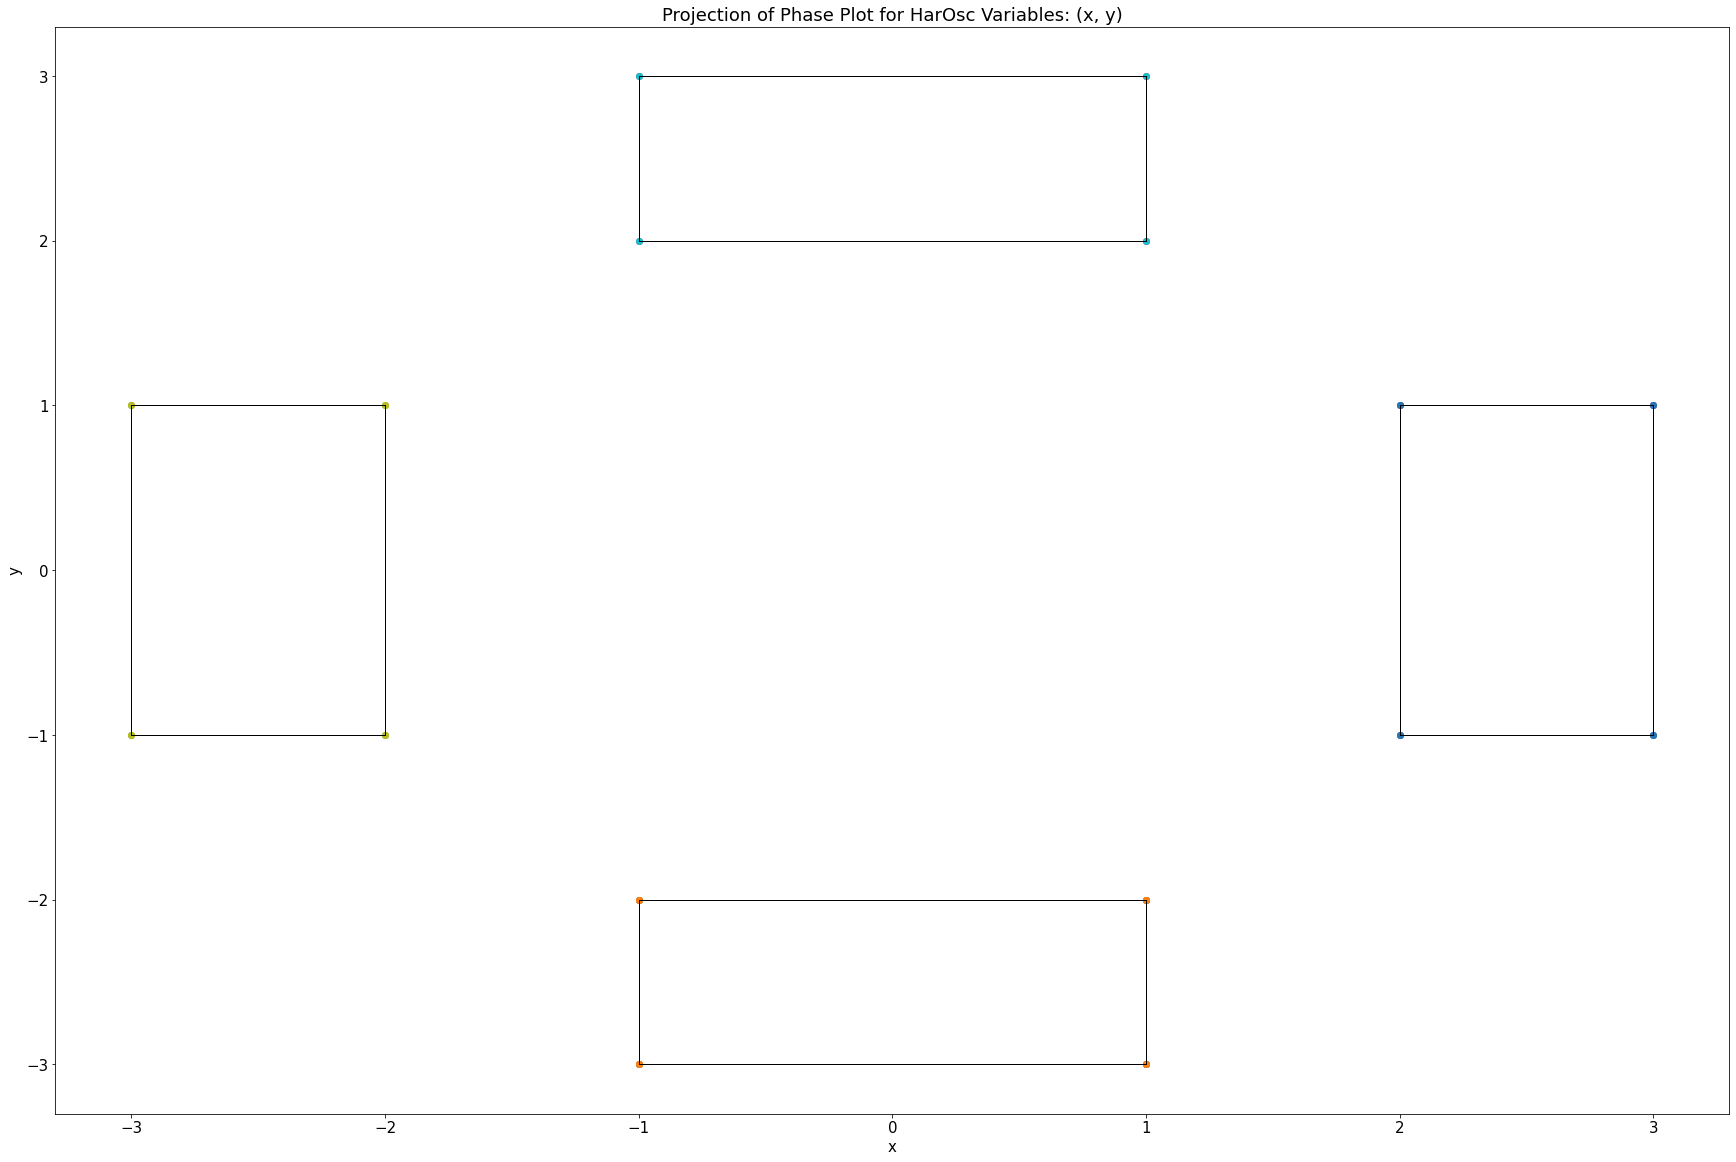

Plotting phase for dimensions x, y done -- Time Spent: 0.3274991512298584
Average Generator Procedure Duration: 0.0043151537577311196 sec
Average Functional Composition Duration: 0.0018848260243733725 sec
Average Bound Computation Duration: 0.00020382404327392578 sec
Average Reachable Set Computation Duration: 0.47363383769989015 sec
Average Phase Duration: 0.3274991512298584 sec


In [2]:
model = HarOsc()
mod_reach = ReachSet(model)

mod_flow = mod_reach.computeReachSet(5)

SIR_PCA_ITER_STEPS = 1 #Number of steps between each recomputation of PCA Templates.
'PCA Strategy Parameters'
SIR_PCA_TRAJ_STEPS = 5 #Number of steps our sample trajectories should run.
SIR_PCA_NUM_TRAJ = 100 #Number of sample trajectories we should use for the PCA routine.

pca_strat = PCAStrat(model, traj_steps=SIR_PCA_TRAJ_STEPS, num_trajs=SIR_PCA_NUM_TRAJ, iter_steps=SIR_PCA_ITER_STEPS)
mod_pca_flow = mod_reach.computeReachSet(5, tempstrat=pca_strat)

vdp_plot = Plot()
vdp_plot.add(mod_flow, "HarOsc")
vdp_plot.add(mod_pca_flow, "HarOsc PCA")
vdp_plot.plot2DPhase(0,1)

Timer.generate_stats()


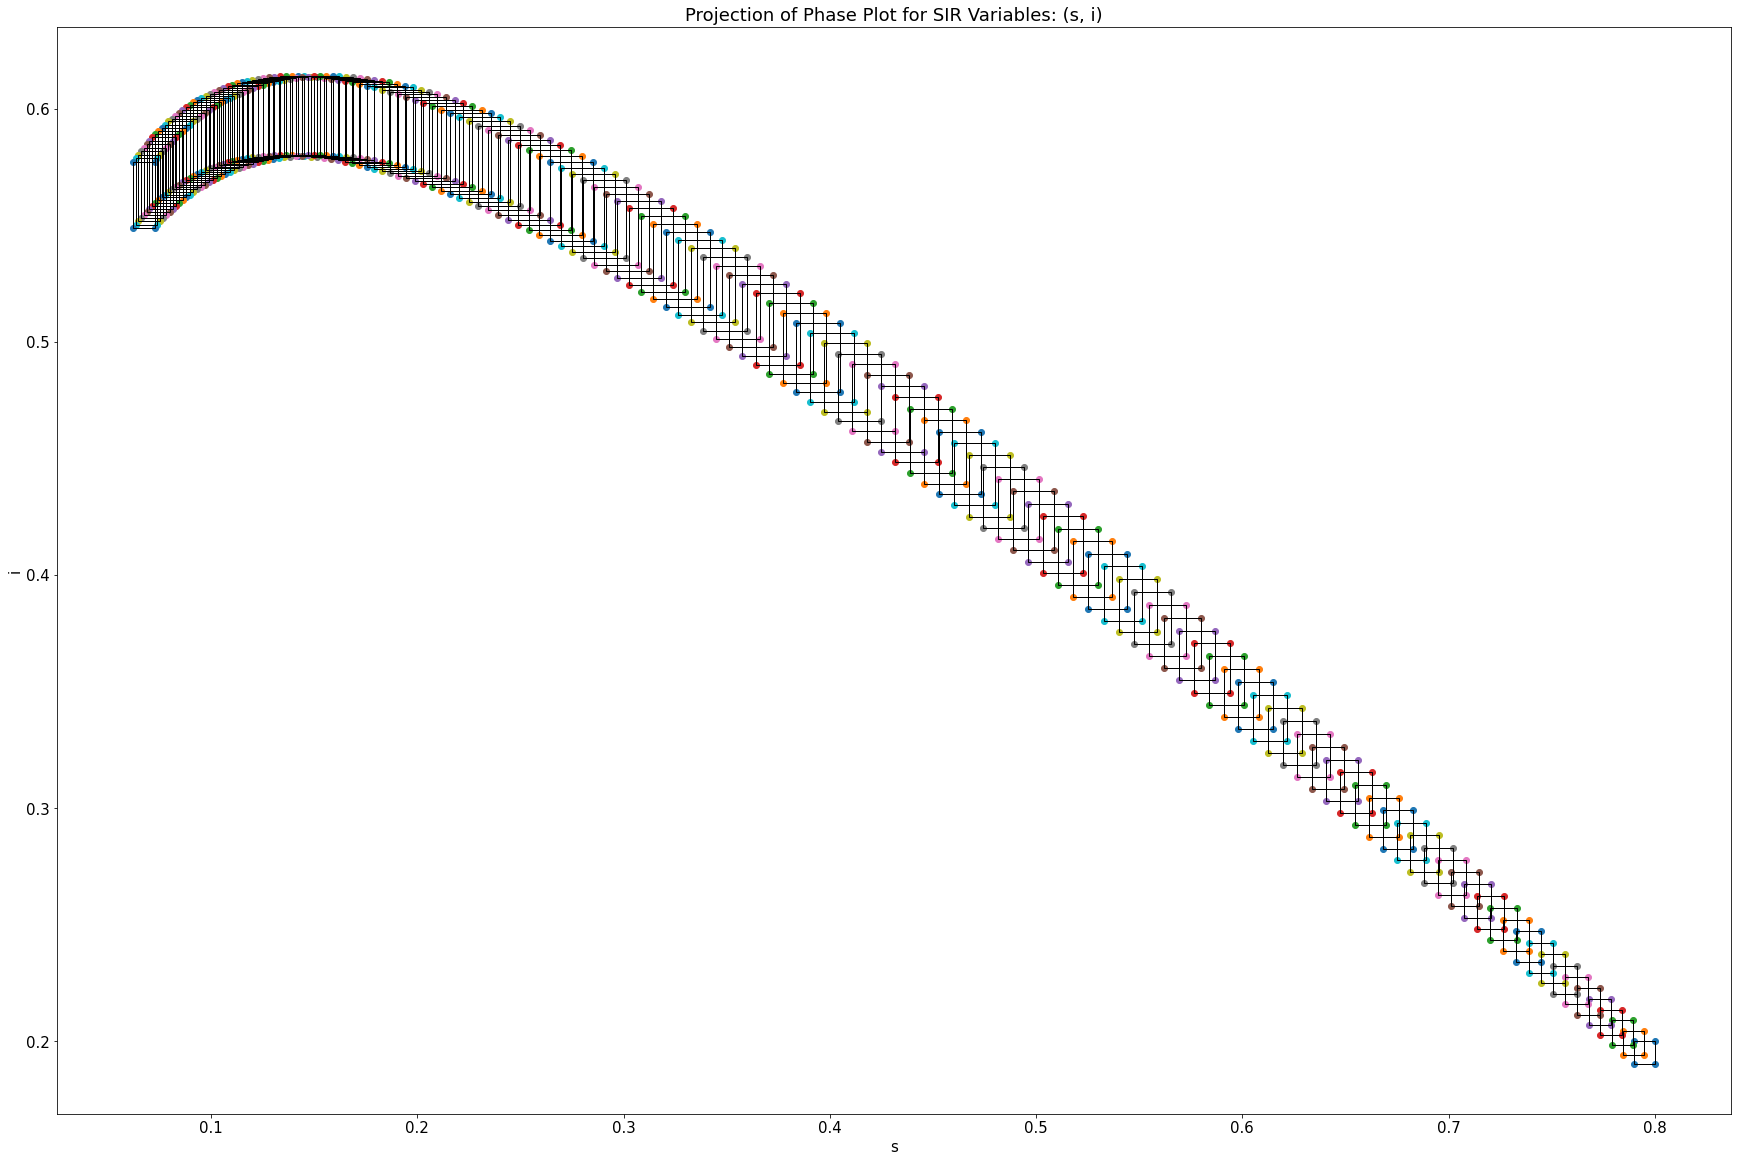

Plotting phase for dimensions s, i done -- Time Spent: 1.1890361309051514
Average Generator Procedure Duration: 0.002354426383972168 sec
Average Functional Composition Duration: 0.009453008439805772 sec
Average Bound Computation Duration: 0.00037169191572401257 sec
Average Reachable Set Computation Duration: 0.10043406804402669 sec
Average Phase Duration: 1.1890361309051514 sec


In [2]:
model = SIR()
#unit_model = VanDerPol_UnitBox()

mod_reach = ReachSet(model)
#unit_mod_reach = ReachSet(unit_model)

mod_flow = mod_reach.computeReachSet(150)
#unit_mod_flow = unit_mod_reach.computeReachSet(150) 

sir_plot = Plot()
sir_plot.add(mod_flow, "SIR")
#vdp_plot.add(unit_mod_flow, "VDP_UNIT")
sir_plot.plot2DPhase(0,1)

Timer.generate_stats()
